In [38]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [39]:
starbucks = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\스타벅스(ID분류).csv', encoding = 'UTF-8')
coffeebean = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\커피빈(ID분류).csv', encoding = 'UTF-8')
ediya = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\이디야(ID분류).csv', encoding = 'UTF-8')
paik = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\빽다방(ID분류).csv', encoding = 'UTF-8')

In [40]:
map_raw = pd.read_excel('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\draw_korea_raw(2021).xlsx')
map_raw.stack()
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace = True)
print(map.shape)
map.head()
map.columns = ['y','x','ID']
map.head()

(250, 3)


,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


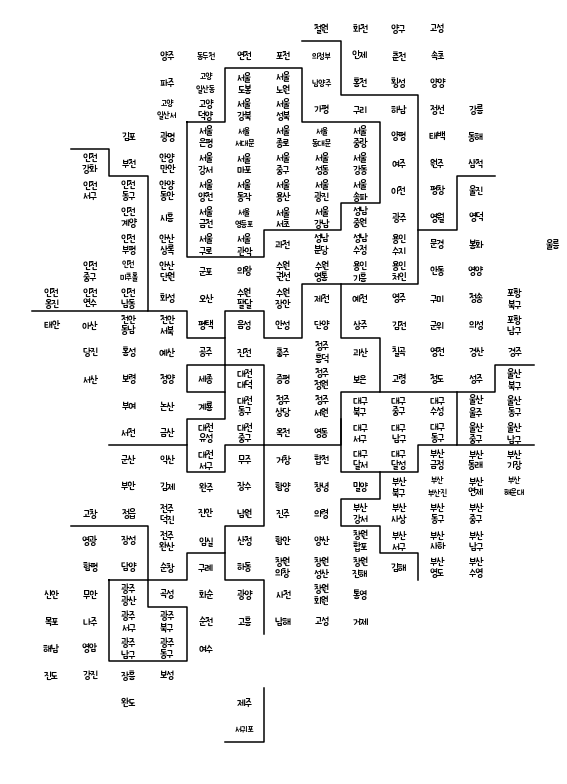

In [41]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [42]:
starbucks = pd.merge(starbucks, map, how = 'left', on = 'ID')
print(starbucks.shape)
starbucks.head()

(1547, 8)


,상호명,지점명,시도명,시군구명,도로명주소,ID,y,x
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉,3.0,11.0
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원),0.0,10.0
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천,1.0,9.0
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천,1.0,9.0
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초,1.0,10.0


In [49]:
starbucks.dropna(subset = ['x'], inplace = True)
starbucks.isnull().sum()

상호명        0
지점명      125
시도명        0
시군구명       0
도로명주소      0
ID         0
y          0
x          0
dtype: int64

In [71]:
num = 0 
for i in starbucks.index:
    try:
        starbucks.x[i] = int(starbucks.x[i])
        starbucks.y[i] = int(starbucks.y[i])
    except:
        # print(i, starbucks.x[i], starbucks.y[i])
        num += 1
print(num)
starbucks.head()

0


,상호명,지점명,시도명,시군구명,도로명주소,ID,y,x
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉,3.0,11.0
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원),0.0,10.0
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천,1.0,9.0
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천,1.0,9.0
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초,1.0,10.0


In [87]:
starbucks_num = starbucks.ID.value_counts()

[[서울 강남     79
  서울 중구     43
  서울 서초     42
  서울 송파     33
  부산 해운대    33
            ..
  인천 옹진      1
  창녕         1
  하동         1
  산청         1
  제천         1
  Name: ID, Length: 159, dtype: int64]]